# 1 - Classificação: o que é e como funciona?

## Importando os dados

In [1]:
import pandas as pd

In [2]:
dados = pd.read_csv("Customer-Churn.csv")
dados.head()

,Maior65Anos,Conjuge,Dependentes,MesesDeContrato,TelefoneFixo,VariasLinhasTelefonicas,ServicoDeInternet,SegurancaOnline,BackupOnline,SeguroNoDispositivo,SuporteTecnico,TVaCabo,StreamingDeFilmes,TipoDeContrato,PagamentoOnline,FormaDePagamento,ContaMensal,Churn
0,0,Sim,Nao,1,Nao,SemServicoTelefonico,DSL,Nao,Sim,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequeDigital,29.85,Nao
1,0,Nao,Nao,34,Sim,Nao,DSL,Sim,Nao,Sim,Nao,Nao,Nao,UmAno,Nao,ChequePapel,56.95,Nao
2,0,Nao,Nao,2,Sim,Nao,DSL,Sim,Sim,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequePapel,53.85,Sim
3,0,Nao,Nao,45,Nao,SemServicoTelefonico,DSL,Sim,Nao,Sim,Sim,Nao,Nao,UmAno,Nao,DebitoEmConta,42.30,Nao
4,0,Nao,Nao,2,Sim,Nao,FibraOptica,Nao,Nao,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequeDigital,70.70,Sim


In [3]:
dados.shape

(7043, 18)

## Diferentes Variáveis

In [4]:
traducao_dic = {"Sim": 1, "Nao": 0}

dados_modificados = dados[["Conjuge","Dependentes","TelefoneFixo","PagamentoOnline","Churn"]].replace(traducao_dic)
dados_modificados.head()

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Churn
0,1,0,0,1,0
1,0,0,1,0,0
2,0,0,1,1,1
3,0,0,0,0,0
4,0,0,1,1,1


In [5]:
# Transformação para 0 ou 1 pelo get_dummies
dummy_dados = pd.get_dummies(dados.drop(["Conjuge","Dependentes","TelefoneFixo","PagamentoOnline","Churn"], axis=1))

# Junção dos dados transformados com os que já tínhamos
dados_final = pd.concat([dados_modificados, dummy_dados], axis=1)
dados_final.head()

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Churn,Maior65Anos,MesesDeContrato,ContaMensal,VariasLinhasTelefonicas_Nao,VariasLinhasTelefonicas_SemServicoTelefonico,...,StreamingDeFilmes_Nao,StreamingDeFilmes_SemServicoDeInternet,StreamingDeFilmes_Sim,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta
0,1,0,0,1,0,0,1,29.85,0,1,...,1,0,0,0,1,0,0,1,0,0
1,0,0,1,0,0,0,34,56.95,1,0,...,1,0,0,0,0,1,0,0,1,0
2,0,0,1,1,1,0,2,53.85,1,0,...,1,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,0,45,42.30,0,1,...,1,0,0,0,0,1,0,0,0,1
4,0,0,1,1,1,0,2,70.70,1,0,...,1,0,0,0,1,0,0,1,0,0


## Definição Formal

Informações para classificação:

$X$ = inputs (dados de entrada)

$y$ = outputs (dados de saída)

In [6]:
# DICA para exibir todas as colunas do DataFrame
# pd.set_option('display.max_columns', 39)

In [7]:
dados_final.head()

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Churn,Maior65Anos,MesesDeContrato,ContaMensal,VariasLinhasTelefonicas_Nao,VariasLinhasTelefonicas_SemServicoTelefonico,...,StreamingDeFilmes_Nao,StreamingDeFilmes_SemServicoDeInternet,StreamingDeFilmes_Sim,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta
0,1,0,0,1,0,0,1,29.85,0,1,...,1,0,0,0,1,0,0,1,0,0
1,0,0,1,0,0,0,34,56.95,1,0,...,1,0,0,0,0,1,0,0,1,0
2,0,0,1,1,1,0,2,53.85,1,0,...,1,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,0,45,42.30,0,1,...,1,0,0,0,0,1,0,0,0,1
4,0,0,1,1,1,0,2,70.70,1,0,...,1,0,0,0,1,0,0,1,0,0


$y_i$ = $f(x_i)$

In [8]:
# Características de Maria
X_maria = [[0, 0, 1, 1, 0, 0, 39.90, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0 ,0 , 1, 0, 0, 1, 0, 0 , 0 ,1]]

In [9]:
#y_maria

Novos pares de informações = ($X_{maria}$, $y_{maria}$)

## Balanceamento dos Dados

In [10]:
import seaborn as sns

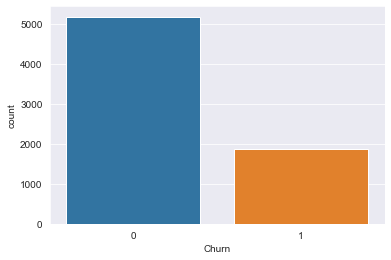

In [11]:
ax = sns.countplot(x='Churn', data=dados_final)

In [12]:
dados_final.Churn.value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [13]:
X = dados_final.drop("Churn", axis = 1)
y = dados_final["Churn"]

In [14]:
#biblioteca para balancear os dados utilizando over_sampling
from imblearn.over_sampling import SMOTE

In [15]:
smt = SMOTE(random_state=123)  # Instancia um objeto da classe SMOTE
X, y = smt.fit_resample(X, y)  # Realiza a reamostragem do conjunto de dados

In [16]:
dados_final = pd.concat([X, y], axis=1)  # Concatena a variável target (y) com as features (X)

# Verifica se o balanceamento e a concatenação estão corretos.
dados_final.head()

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Maior65Anos,MesesDeContrato,ContaMensal,VariasLinhasTelefonicas_Nao,VariasLinhasTelefonicas_SemServicoTelefonico,VariasLinhasTelefonicas_Sim,...,StreamingDeFilmes_SemServicoDeInternet,StreamingDeFilmes_Sim,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta,Churn
0,1,0,0,1,0,1,29.85,0,1,0,...,0,0,0,1,0,0,1,0,0,0
1,0,0,1,0,0,34,56.95,1,0,0,...,0,0,0,0,1,0,0,1,0,0
2,0,0,1,1,0,2,53.85,1,0,0,...,0,0,0,1,0,0,0,1,0,1
3,0,0,0,0,0,45,42.30,0,1,0,...,0,0,0,0,1,0,0,0,1,0
4,0,0,1,1,0,2,70.70,1,0,0,...,0,0,0,1,0,0,1,0,0,1


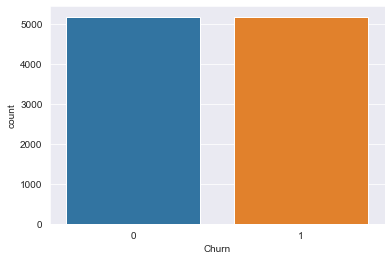

In [17]:
ax = sns.countplot(x='Churn', data=dados_final)  # plotando a variável target balanceada.

In [18]:
dados_final.Churn.value_counts()

0    5174
1    5174
Name: Churn, dtype: int64

# 2 - Modelo K-Nearest Neighbors (KNN)

In [19]:
X_maria

[[0,
  0,
  1,
  1,
  0,
  0,
  39.9,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1]]

In [20]:
# Divisão em inputs e outputs
X = dados_final.drop("Churn", axis=1)
y = dados_final.Churn

In [21]:
# Biblioteca para normalizar os dados (x - média do conjunto / desvio padrão)
from sklearn.preprocessing import StandardScaler

In [22]:
norm = StandardScaler()

X_normalizado = norm.fit_transform(X)
X_normalizado

array([[ 1.26542767, -0.52756038, -3.06083934, ...,  1.30373042,
        -0.47943196, -0.4360152 ],
       [-0.79024667, -0.52756038,  0.32670777, ..., -0.76702973,
         2.08580171, -0.4360152 ],
       [-0.79024667, -0.52756038,  0.32670777, ..., -0.76702973,
         2.08580171, -0.4360152 ],
       ...,
       [-0.79024667, -0.52756038,  0.32670777, ...,  1.30373042,
        -0.47943196, -0.4360152 ],
       [-0.79024667, -0.52756038,  0.32670777, ..., -0.76702973,
        -0.47943196, -0.4360152 ],
       [-0.79024667, -0.52756038,  0.32670777, ..., -0.76702973,
        -0.47943196, -0.4360152 ]])

In [23]:
X_normalizado[[0],]

array([[ 1.26542767, -0.52756038, -3.06083934,  0.81514931, -0.41254225,
        -1.10768665, -1.32177005, -0.88499468,  3.18604176, -0.83366906,
         1.51268338, -1.04386816, -0.44617598,  0.868102  , -0.44617598,
        -0.51751958, -0.95853201, -0.44617598,  1.57389661,  1.04306   ,
        -0.44617598, -0.6419641 ,  0.87997069, -0.44617598, -0.52426638,
         1.18690873, -0.44617598, -0.77707385,  1.20287745, -0.44617598,
        -0.79008532, -0.44648735,  0.73773107, -0.41989297, -0.42576817,
         1.30373042, -0.47943196, -0.4360152 ]])

In [24]:
# É necessário transformar os dados de Maria (tipo lista) para um DataFrame bidimensional do Pandas
# X_maria_normalizado = norm.transform(pd.DataFrame(X_maria, columns=X.columns))
maria_df = pd.DataFrame(X_maria, columns=X.columns)
X_maria_normalizado = norm.transform(maria_df)
X_maria_normalizado

array([[-0.79024667, -0.52756038,  0.32670777,  0.81514931, -0.41254225,
        -1.14935017, -0.9723572 ,  1.1299503 , -0.31386908, -0.83366906,
        -0.66107688,  0.95797538, -0.44617598,  0.868102  , -0.44617598,
        -0.51751958, -0.95853201, -0.44617598,  1.57389661,  1.04306   ,
         2.24126814, -0.6419641 , -1.13640148,  2.24126814, -0.52426638,
         1.18690873, -0.44617598, -0.77707385, -0.83133988, -0.44617598,
         1.26568609, -0.44648735, -1.35550751,  2.38155929, -0.42576817,
        -0.76702973, -0.47943196,  2.293498  ]])

Distância Euclidiana:

$\sqrt{\sum^k_{i=1}(a_{i} - b_{i})^2}$

In [25]:
import numpy as np

In [26]:
a = X_maria_normalizado
b = X_normalizado[[0],:]

In [27]:
# 1 - primeiro a subtração
a - b

array([[-2.05567434,  0.        ,  3.38754711,  0.        ,  0.        ,
        -0.04166352,  0.34941285,  2.01494498, -3.49991084,  0.        ,
        -2.17376025,  2.00184354,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         2.68744412,  0.        , -2.01637218,  2.68744412,  0.        ,
         0.        ,  0.        ,  0.        , -2.03421733,  0.        ,
         2.05577141,  0.        , -2.09323857,  2.80145225,  0.        ,
        -2.07076016,  0.        ,  2.72951321]])

In [28]:
# 2 - depois a exponenciação
np.square(a - b)

array([[4.22579699e+00, 0.00000000e+00, 1.14754754e+01, 0.00000000e+00,
        0.00000000e+00, 1.73584854e-03, 1.22089340e-01, 4.06000326e+00,
        1.22493759e+01, 0.00000000e+00, 4.72523363e+00, 4.00737757e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        7.22235589e+00, 0.00000000e+00, 4.06575675e+00, 7.22235589e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        4.13804017e+00, 0.00000000e+00, 4.22619609e+00, 0.00000000e+00,
        4.38164773e+00, 7.84813473e+00, 0.00000000e+00, 4.28804763e+00,
        0.00000000e+00, 7.45024235e+00]])

In [29]:
# 3 - terceiro a soma
np.sum(np.square(a - b))

91.70986517145157

In [30]:
# 4 - então tiramos a raiz e temos nossa distância
np.sqrt(np.sum(np.square(a - b)))

9.576526780177225

## Implementando o modelo

In [31]:
# biblioteca para divisão dos dados
from sklearn.model_selection import train_test_split

In [32]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X_normalizado, y, test_size=0.3, random_state=123)

Treino e teste

In [34]:
# biblioteca para criarmos o modelo de machine learning
from sklearn.neighbors import KNeighborsClassifier

In [36]:
# instanciar o modelo (criamos o modelo) - por padrão são 5 vizinhos
knn = KNeighborsClassifier(metric="euclidean")

In [37]:
# treinando o modelo com os dados de treino
knn.fit(X_treino, y_treino)

KNeighborsClassifier(metric='euclidean')

In [38]:
# testando o modelo com os dados de teste
predito_knn = knn.predict(X_teste)

In [39]:
predito_knn

array([1, 0, 0, ..., 0, 1, 1], dtype=int64)

Exercício - Calcule a distância euclidiana de Maria com os 10 primeiros clientes da nossa base de dados normalizada utilizando a métrica euclidiana.

In [41]:
soma = 0
for i in range(10):
    a = X_maria_normalizado
    b = X_normalizado[[i],:]

    diferenca = a - b
    quadrado_diferenca = np.square(diferenca)
    soma = np.sum(quadrado_diferenca)
    distancia = np.sqrt(soma)
    print(f"Distância para o elemento {i}: {distancia}")

Distância para o elemento 0: 9.576526780177225
Distância para o elemento 1: 9.164133279757106
Distância para o elemento 2: 8.49659276250102
Distância para o elemento 3: 10.037276792007964
Distância para o elemento 4: 7.802847729252477
Distância para o elemento 5: 9.011721779206102
Distância para o elemento 6: 8.970072364668107
Distância para o elemento 7: 10.634393972475307
Distância para o elemento 8: 9.4504013151968
Distância para o elemento 9: 7.919722083466357


# 3 - Naïve Bayes

## Treino e teste

In [42]:
X_treino

array([[-0.79024667, -0.52756038, -3.06083934, ..., -0.76702973,
         2.08580171, -0.4360152 ],
       [ 1.26542767,  1.89551764,  0.32670777, ..., -0.76702973,
         2.08580171, -0.4360152 ],
       [-0.79024667, -0.52756038,  0.32670777, ...,  1.30373042,
        -0.47943196, -0.4360152 ],
       ...,
       [ 1.26542767,  1.89551764,  0.32670777, ..., -0.76702973,
         2.08580171, -0.4360152 ],
       [ 1.26542767,  1.89551764,  0.32670777, ...,  1.30373042,
        -0.47943196, -0.4360152 ],
       [-0.79024667, -0.52756038,  0.32670777, ...,  1.30373042,
        -0.47943196, -0.4360152 ]])

In [43]:
y_treino

4831    0
5077    0
9023    1
4424    1
5236    0
       ..
9785    1
7763    1
5218    0
1346    1
3582    0
Name: Churn, Length: 7243, dtype: int64

## Implementando o modelo

In [44]:
# escolho utilizar a mediana (no binarize do BernoulliNB), porque é o valor central dos nossos dados ordenados
np.median(X_treino)

-0.4461759755508453

In [45]:
# biblioteca para criarmos o modelo de machine learning
from sklearn.naive_bayes import BernoulliNB

In [47]:
# criamos o modelo
bnb = BernoulliNB(binarize=-0.44) # acima de -0.44 transforma em 1 e abaixo em zero

In [48]:
bnb.fit(X_treino, y_treino)

BernoulliNB(binarize=-0.44)

In [49]:
predito_bnb = bnb.predict(X_teste)

In [50]:
predito_bnb

array([1, 0, 0, ..., 1, 1, 1], dtype=int64)

# 4 - Árvore de Decisão (Decision Tree)

## Implementando o modelo

In [51]:
# biblioteca para criarmos o modelo de machine learning
from sklearn.tree import DecisionTreeClassifier

In [52]:
# instanciando o modelo
dtc = DecisionTreeClassifier(criterion="entropy", random_state=42)

In [53]:
# treinar o modelo
dtc.fit(X_treino, y_treino)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [54]:
# verificar a importância de cada atributo (entropy = quanto menor melhor)
dtc.feature_importances_

array([0.02120757, 0.01359941, 0.0068095 , 0.01980908, 0.01889643,
       0.16281074, 0.22256182, 0.00930128, 0.00344576, 0.01008899,
       0.0019815 , 0.03131262, 0.00065123, 0.00849934, 0.        ,
       0.01697374, 0.00622973, 0.        , 0.00964718, 0.01267467,
       0.00027769, 0.00770208, 0.01306512, 0.00368329, 0.02048948,
       0.00371587, 0.        , 0.00156955, 0.00671244, 0.0003825 ,
       0.01126638, 0.03611651, 0.16384005, 0.07422263, 0.0176017 ,
       0.02131358, 0.02184439, 0.01969615])

In [55]:
predito_dtc = dtc.predict(X_teste)

In [56]:
predito_dtc

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

# 5 - Validação dos modelos

## Matriz de confusão

In [57]:
from sklearn.metrics import confusion_matrix

In [58]:
print(confusion_matrix(y_teste, predito_knn))

[[1240  329]
 [ 247 1289]]


In [59]:
print(confusion_matrix(y_teste, predito_bnb))

[[1050  519]
 [ 242 1294]]


In [64]:
confusion_matrix(y_teste, predito_dtc)

array([[1253,  316],
       [ 276, 1260]], dtype=int64)

Exemplo

In [61]:
                     # VN VP FP VP VN VN VP VN FN FP
valores_preditos =    [0, 1, 1, 1, 0, 0, 1, 0, 0, 1]
valores_verdadeiros = [0, 1, 0, 1, 0, 0, 1, 0, 1, 0]

mc = confusion_matrix(valores_verdadeiros, valores_preditos)  # Matriz de confusão
mc

array([[4, 2],
       [1, 3]], dtype=int64)

## Acurácia

$ACC = \frac{VP+VN}{VP+FP+VN+FN}$

In [65]:
from sklearn.metrics import accuracy_score

In [66]:
# modelo KNN
print(accuracy_score(y_teste, predito_knn))

0.8144927536231884


In [67]:
# modelo Bernoulli de Naïve Bayes
print(accuracy_score(y_teste, predito_bnb))

0.7549114331723027


In [68]:
# modelo Árvore de Decisão
print(accuracy_score(y_teste, predito_dtc))

0.8093397745571659


## Precisão

$PS = \frac{VP}{VP+FP}$

In [70]:
from sklearn.metrics import precision_score

In [71]:
# modelo KNN
print(precision_score(y_teste, predito_knn))

0.7966625463535228


In [72]:
# modelo Bernoulli de Naïve Bayes
print(precision_score(y_teste, predito_bnb))

0.7137341423055709


In [73]:
# modelo Árvore de Decisão
print(precision_score(y_teste, predito_dtc))

0.799492385786802


## Recall

$RC = \frac{VP}{VP+FN}$

In [75]:
from sklearn.metrics import recall_score

In [76]:
# modelo KNN
print(recall_score(y_teste, predito_knn))

0.8391927083333334


In [77]:
# modelo Bernoulli de Naïve Bayes
print(recall_score(y_teste, predito_bnb))

0.8424479166666666


In [78]:
# modelo Árvore de Decisão
print(recall_score(y_teste, predito_dtc))

0.8203125


Exercício

In [88]:
# Diagnóstico
predito = [0,0,0,0,1,1,1,1,0,1,0,1]
real = [1,1,0,0,1,1,1,0,1,0,1,0]

matriz = confusion_matrix(real, predito)
matriz

array([[2, 3],
       [4, 3]], dtype=int64)

In [92]:
ps = matriz[1][1] / (matriz[1][1] + matriz[0][1])
rc = matriz[1][1] / (matriz[1][1] + matriz[1][0])
f1 = 2 * ((ps * rc) / (ps + rc))

print("Recall:", rc.round(3))
print("F1 score:", f1.round(3))

Recall: 0.429
F1 score: 0.462


## Escolhendo o melhor modelo

In [94]:
# Exemplo - análise das previsões calculadas anteriormente

print("Modelo KNN:", precision_score(y_teste, predito_knn))
print("Modelo Bernoulli de Naïve Bayes:", precision_score(y_teste, predito_bnb))
print("Modelo Árvore de Decisão:", precision_score(y_teste, predito_dtc))

Modelo KNN: 0.7966625463535228
Modelo Bernoulli de Naïve Bayes: 0.7137341423055709
Modelo Árvore de Decisão: 0.799492385786802
